# <font color=#800000>PHYS 249 Midterm Part B [Computational Physics] [25 marks]</font>
> *Deadline: Friday, October 11th, 2024 @ 11:59pm   |   Penalty: Grade of Zero Given for Late Submissions - This is an Exam*

Please submit Part B [Computational Physics] to LEARN Dropbox. You MUST submit a file with .IPYNB extension. Any questions/concerns can be directed to Dr. Brenda Lee at brenda.lee@uwaterloo.ca and problems should be reported prior to the deadline.

---

**Note:** You are allowed to use any resources available to you. **Since this is an exam, Discord will be monitored for solution sharing, but you can certainly create tickets and support each other in debugging code.** But remember, each student must submit their own work. Copy-pasting from others is not allowed and if caught, will result in Policy 71 allegations. Comment as much as possible and make it known to the grader that you are explaining every step you're taking to code your solution.

#### <font color=#8B0000>Problem B1: Electrons Moving Through an Electric Field [4 marks]</font>

In this question, inspired by condensed matter physics, we are looking at the work done by an electric field on an electron moving through it. The equation for this is given by:
$$W = q(\vec{E}\cdot\Delta\vec{r})$$

In a crystalline solid, an electron is subjected to a uniform electric field $\vec{E} = [1000,500]$ V/m. The electron is in a quantum state with a wavevector of $\vec{k} = [0.5,1]$ nm<sup>-1</sup>. The group velocity of the electron is then calculated to be $\vec{v_g} = [5.77\times 10^5,1.15\times 10^6]$ m/s and it moves through a displacement of $\Delta\vec{r}=[2\times10^{-9}, 4\times 10^{-9}]$ m.

Answer the following using Python code:
* Find the **work done on the electron by the electric field** as it moves through the given displacement
* Find the **projection of the electric field onto the group velocity $\vec{v_g}$**. This value tells you how much of the electric field is aligned with the group velocity of the electron, and provides insight into how the field influences the electron's motion in its quantum state.

Grades will be broken down as follows:
* 1 mark for correct setup using Python code
* 1 mark for correct work equation and code
* 1 mark for correct projection and code
* 1 mark for quality of comments and code with units in output

In [2]:
# Enter solution here and be sure to add comments to explain each of your key steps
import numpy as np

# Define constants and vectors
q = -1.6e-19 # Coulombs
E = np.array([1000, 500]) # V/m
delta_r = np.array([2e-9, 4e-9]) # m
vg = np.array([5.77e5, 1.15e6]) # m/s

# Calculate work done -> W = q * (E dot delta_r)
work = q * np.dot(E, delta_r)

# Calculate projection -> proj_E_on_vg = ((vg dot E)/(abs(vg))^2) * vg
proj_E_on_vg = vg * (np.dot(vg, E) / (np.linalg.norm(vg)) ** 2)

# Output results
print(f"Work done on the electron by the electric field along {delta_r} m is {work} N")
print(f"Projection of the elctric field onto the gorup velocity is {proj_E_on_vg} V/m")

Work done on the electron by the electric field along [2.e-09 4.e-09] m is -6.400000000000001e-25 N
Projection of the elctric field onto the gorup velocity is [401.52975452 800.27594056] V/m


#### <font color=#8B0000>Problem B2: Piezoelectric Resonator Energy with Crystals [6 marks]</font>

A researcher is working on a piezoelectric resonator system using quartz, amethyst and tourmaline. In piezoelectric materials, energy is generated when mechanical stress is applied to the crystal, which produces a voltage. The amount of energy that is generated is quite small and can be measured in joules. Each type of crystal resonates at a different frequency and contributes to the total energy output of the resonator. The vibrational frequencies and energy outputs are as follows:
* **Quartz** resonates at 32.768 kHz, contributes 1 mJ per crystal and its mass is 1 g per crystal
* **Amethyst** is a type of quartz with the same resonance, but because of its structure contributes 2 mJ per crystal and has a mass of 2 g per crystal
* **Tourmaline** resonates at 34.000 kHz, contributes 3 mJ per crystal and its mass is 4 g per crystal

The piezoelectric resonator contains a total of 30 crystals, and the total energy output of the system is 60 mJ. Additionally, the total mass of the crystals in the resonator is 70 grams. Although most piezoelectric materials are used in low quantity for sensors/actuators, medical devices, frequency control in electronics, etc., this researcher wants to combine several together for a specific purpose.

How many quartz, amethyst and tourmaline crystals are in the piezoelectric resonator? Be mindful of how you present your answers - they should make sense (ie. should they be integer or real values?).

Grades will be broken down as follows:
* 1 mark for correct formulation of equations
* 3 marks for correct usage of Python code to solve linear equations through `sympy` or `numpy`
* 1 mark for correct solution
* 1 mark for quality of code and commenting

In [3]:
# Enter solution here and be sure to add comments to explain each of your key steps
import sympy as sp
from sympy import symbols, Eq, solve, pprint

# Define the variables/unknowns
totalCrystals = 30 # crystals
totalEnergy = 60 # mJ
totalMass = 70 # g

# let x1, x2, x3 be the number of quartz, amethyst, and tourmaline crystals respectively
x1, x2, x3 = symbols('x1 x2 x3')

# Three equations to represent the system
# 1. Total number of crystals: x1 + x2 + x3 = 30
# 2. Total energy: x1 + 2x2 + 3x3 = 60
# 3. Total mass: x1 + 2x2 + 4x3 = 70
# Define equations:
eq1 = Eq(x1 + x2 + x3, totalCrystals)
eq2 = Eq(x1 + 2*x2 + 3*x3, totalEnergy)
eq3 = Eq(x1 + 2*x2 + 4*x3, totalMass)

# Use SymPy to solve equations
solution = sp.solve([eq1, eq2, eq3], (x1, x2, x3))

# Output results
print("The number of quarts, amethyst, and tourmaline crystals in the piezoelectric resonator is: ")
pprint(solution)

The number of quarts, amethyst, and tourmaline crystals in the piezoelectric resonator is: 
{x₁: 10, x₂: 10, x₃: 10}


#### <font color=#8B0000>Problem B3: Gravitational Field of a Binary Star System [15 marks]</font>

In this problem, you will be simulating the gravitational field of a binary star system. There are two stars of masses $M_1 = 2\times 10^{30}$ kg (approximately the mass of the Sun) and $M_2 = 4\times 10^{30}$ kg separated by a distance $d = 10^{11}$ m. You are tasked with plotting the gravitational field vectors in the region surrounding the binary system. For simplicity, let's assume that both stars are stationary and lie along the $x$-axis, with $M_1$ located at $(-0.5d, 0)$ and $M_2$ located at $(+0.5d, 0)$.

The gravitational field at any point $(x,y)$ due to a star with mass $M$ located at $(x_0, y_0)$ is given by:
$$\vec{g} = -\frac{GM}{r^2} \hat{r}$$

where:
* $G = 6.674 \times 10^{-11}$ m<sup>3</sup>kg<sup>-1</sup>s<sup>-2</sup> is the gravitational constant,
* $r = \sqrt{(x-x_0)^2 + (y-y_0)^2}$ is the distance from the mass to the point $(x,y)$, and
* $\hat{r}$ is the unit vector pointing from the mass to the point $(x,y)$.

Your task is to:
* Write a Python function using `numpy` to compute the gravitational field vector at any point $(x,y)$ due to both stars
* Use `plt.quiver` and a `for` loop to create a plot of the gravitational field vectors at discrete points surrounding the binary system - you must use a different colour for the field vectors for each star
* Display the binary star locations on the plot as points or markers
* Make sure the plot is well-labelled and that the vector field appears physically meaningful

Grades will be broken down as follows:
* 5 marks for the correct implementation of gravitational field calculation through a function - be mindful of handling vector components
* 3 marks for generating a set of $(x,y)$ coordinates through a `for` loop to evaluate gravitational field and having enough points made
* 4 marks for correctly using `np.quiver` to plot the gravitational vector fields and must plot stars as well
* 2 marks for correctly plotting and labelling stars, vector fields and having titles, labeled axes and a legend
* 1 mark for overall quality of commenting and code

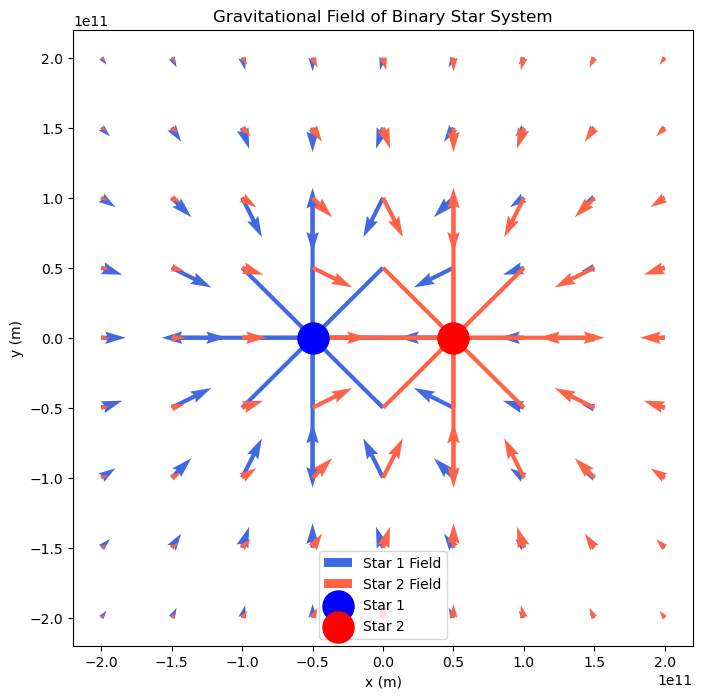

In [37]:
# Enter solution here and be sure to add comments to explain each of your key steps
import numpy as np
import matplotlib.pyplot as plt

# Define constants
M1 = 2e30 # Mass of first star (kg)
M2 = 4e30 # Mass of second star (kg)
d = 10**11 # Distance between stars (m)
G = 6.674e-11 # Gravitational constant (m^3 kg^-1 s^-2)

# Define position of the stars
star1 = np.array([-0.5*d, 0]) # position of star 1
star2 = np.array([0.5*d, 0]) # position of star 2

# Function to compute gravitational field due to one star
def gravitational_field(M, star, point):
    """
    Computes the gravitational field vector at a given point due to a star.

    M: Mass of the star (kg)
    star: Position of the star (numpy array)
    point: Position of point where gravitational field is calculated (numpy array)

    Returns: Gravitational field vector (numpy array)
    """
    r = point - star # vector from star to the point
    r_norm = np.linalg.norm(r) # distance between stars

    # checks if point is at star's postition to avoid errors due to division by zero
    if r_norm == 0:
        return np.array([0,0]) # this means no field at the star's location
    
    r_unitvector = r / r_norm # unit vector in the direction of the field

    g = -G * M * r_unitvector / (r_norm**2) # gravitational field 

    return g

# Function to compute gravitational field due to both stars
def tot_gravitational_field(point):
    """
    Computes the total gravitational field at a point due to both stars.

    point: Position where the graviational field is calculated (numpy array)

    Returns:
    Total gravitational field vector due to both stars (numpy array)
    """

    g1 = gravitational_field(M1, star1, point) # gravitational field from star 1
    g2 = gravitational_field(M2, star2, point) # gravitational field from star 2

    g_tot = g1 + g2

    return g_tot

# Generate grid of x and y values to cover plane around stars
# np.linspace is used to create evenly spaced points between -2d and 2d for x and y
xVals = np.linspace(-2*d, 2*d, 9)
yVals = np.linspace(-2*d, 2*d, 9)

# Initialize lists to store field vectors and grid points
g1x, g1y = [], [] # field components for star 1
g2x, g2y = [], [] # field components for star 2
xPoints, yPoints = [], [] # lists to store the grid points (x, y)

# Loop over the grid points and calculate the gravitational fields
for x in xVals:
    for y in yVals:
        point = np.array([x, y]) # create point in (x, y) grid

        # store the grid points
        xPoints.append(x)
        yPoints.append(y)


        # gravitational field due to star 1
        g1 = gravitational_field(M1, star1, point)
        g1x.append(g1[0]) # adds x component of gravitational field from star 1 to field component
        g1y.append(g1[1]) # adds y component of gravtational field from star 1 to field component

        # gravitational field due to star 2
        g2 = gravitational_field(M2, star2, point)
        g2x.append(g2[0]) # x component of gravitational field from star 2
        g2y.append(g2[1]) # y component of gravitational field from star 2

# convert lists to arrays for easier plotting with plt.quiver
g1x = np.array(g1x)
g1y = np.array(g1y)
g2x = np.array(g2x)
g2y = np.array(g2y)
xPoints = np.array(xPoints)
yPoints = np.array(yPoints)

# Create a figure with specific size
plt.figure(figsize=(8, 8))

# Plot the gravitational field due to star 1
plt.quiver(xPoints, yPoints, g1x, g1y, color='royalblue', angles='xy', scale_units='xy', label="Star 1 Field")

# Plot the gravitational field due to star 2
plt.quiver(xPoints, yPoints, g2x, g2y, color='tomato', angles='xy', scale_units='xy', label="Star 2 Field")    

# Plot positions of both stars
plt.scatter(star1[0], star1[1], color='blue', s=500, label='Star 1')
plt.scatter(star2[0], star2[1], color='red', s=500, label='Star 2')

# Add title, axis labels, and legend
plt.title('Gravitational Field of Binary Star System')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

# display plot
plt.show()

